In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [165]:
df = pd.read_csv('/content/csv_file_path')
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         614 non-null    int64  
 1   Loan_ID            614 non-null    object 
 2   Gender             601 non-null    object 
 3   Married            611 non-null    object 
 4   Dependents         599 non-null    object 
 5   Education          614 non-null    object 
 6   Self_Employed      582 non-null    object 
 7   ApplicantIncome    614 non-null    int64  
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         592 non-null    float64
 10  Loan_Amount_Term   600 non-null    float64
 11  Credit_History     564 non-null    float64
 12  Property_Area      614 non-null    object 
 13  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 67.3+ KB


In [170]:
df.isnull().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanamount_log       0
dtype: int64

<Axes: >

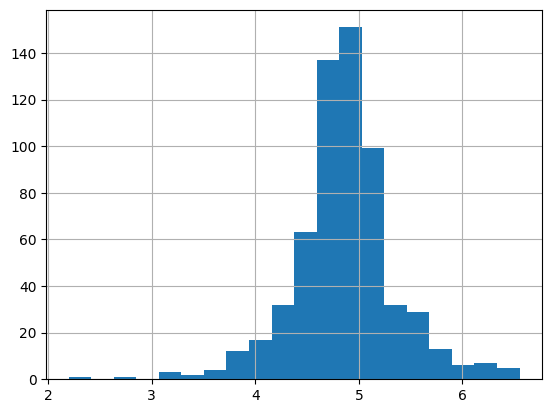

In [171]:
df['loanamount_log'] = np.log(df['LoanAmount'])
df['loanamount_log'].hist(bins = 20)

<Axes: >

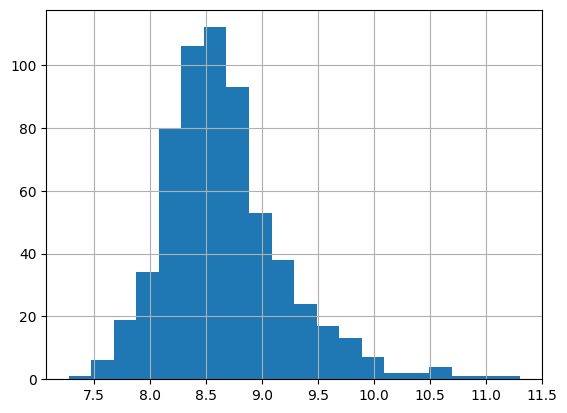

In [111]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['totalamount_log'] = np.log(df['TotalIncome'])
df['totalamount_log'].hist(bins =20)

In [172]:
df.isnull().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanamount_log       0
dtype: int64

In [173]:
df['Gender'].fillna(df['Gender'].mode()[0] ,inplace = True)
df['Married'].fillna(df['Married'].mode()[0] ,inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0] ,inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0] ,inplace = True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanamount_log = df.loanamount_log.fillna(df.loanamount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0] ,inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0] ,inplace = True)

df.isnull().sum()


Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanamount_log       0
dtype: int64

In [182]:
x= df.iloc[ : ,np.r_[1:5,9:12,14:15]].values
y= df.iloc[ : ,13].values

x

array([['LP001002', 'Male', 'No', ..., 360.0, 1.0, 4.986425672954842],
       ['LP001003', 'Male', 'Yes', ..., 360.0, 1.0, 4.852030263919617],
       ['LP001005', 'Male', 'Yes', ..., 360.0, 1.0, 4.189654742026425],
       ...,
       ['LP002983', 'Male', 'Yes', ..., 360.0, 1.0, 5.53338948872752],
       ['LP002984', 'Male', 'Yes', ..., 360.0, 1.0, 5.231108616854587],
       ['LP002990', 'Female', 'No', ..., 360.0, 0.0, 4.890349128221754]],
      dtype=object)

In [183]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [184]:
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanamount_log
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760


number of people who take loan as group by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


Text(0, 0.5, 'Count')

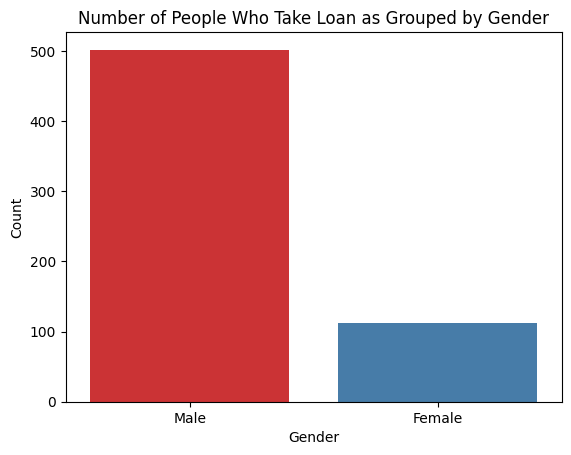

In [185]:
print('number of people who take loan as group by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender' ,hue = 'Gender' ,data = df ,palette= 'Set1')
plt.title('Number of People Who Take Loan as Grouped by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')


number of people who take loan as group by Married
Married
Yes    401
No     213
Name: count, dtype: int64


Text(0, 0.5, 'Count')

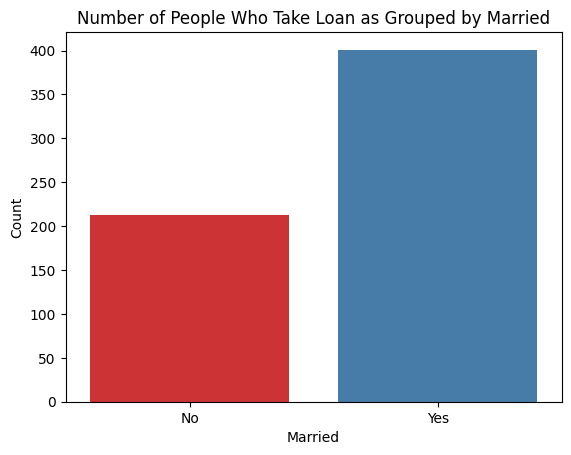

In [186]:
print('number of people who take loan as group by Married')
print(df['Married'].value_counts())
sns.countplot(x='Married' ,hue = 'Married' ,data = df ,palette= 'Set1')
plt.title('Number of People Who Take Loan as Grouped by Married')
plt.xlabel('Married')
plt.ylabel('Count')

number of people who take loan as group by Dependents
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


Text(0, 0.5, 'Count')

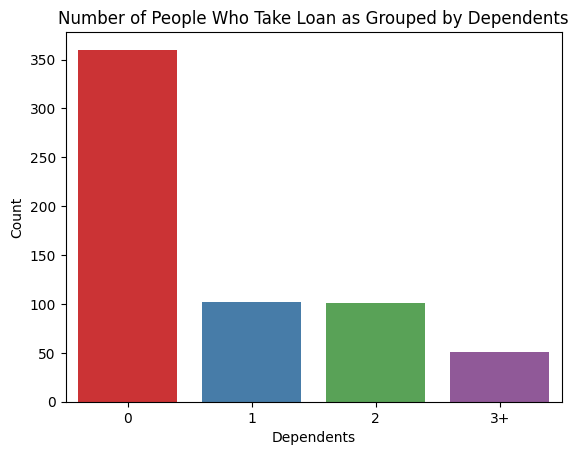

In [118]:
print('number of people who take loan as group by Dependents')
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents' ,hue = 'Dependents' ,data = df ,palette= 'Set1')
plt.title('Number of People Who Take Loan as Grouped by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')

number of people who take loan as group by Self_Employed
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


Text(0, 0.5, 'Count')

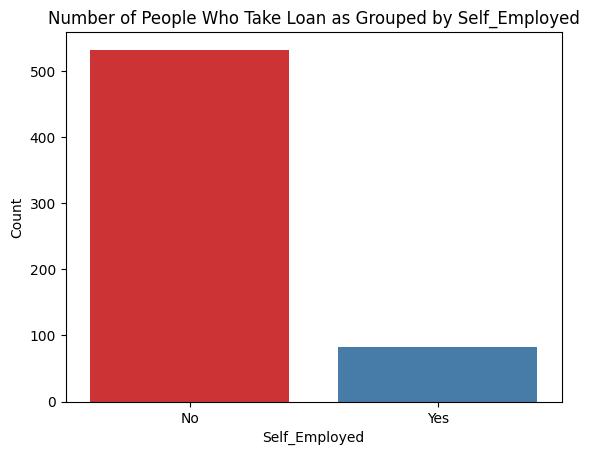

In [119]:
print('number of people who take loan as group by Self_Employed')
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed' ,hue = 'Self_Employed' ,data = df ,palette= 'Set1')
plt.title('Number of People Who Take Loan as Grouped by Self_Employed')
plt.xlabel('Self_Employed')
plt.ylabel('Count')

number of people who take loan as group by LoanAmount
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<ipython-input-120-3c06b3c654b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoanAmount'  ,data = df ,palette= 'Set1')


Text(0, 0.5, 'Count')

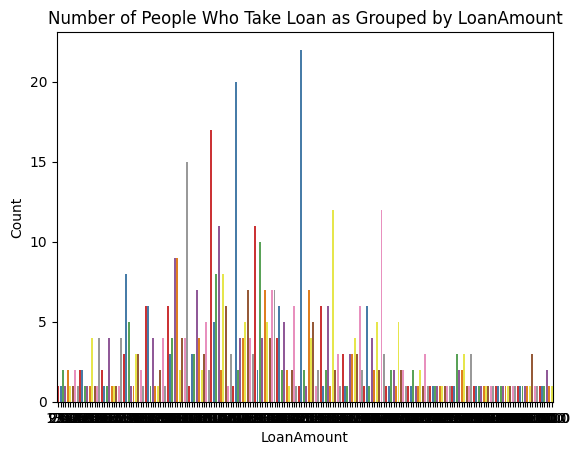

In [120]:
print('number of people who take loan as group by LoanAmount')
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount'  ,data = df ,palette= 'Set1')
plt.title('Number of People Who Take Loan as Grouped by LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Count')

number of people who take loan as group by Credit_History
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


Text(95.72222222222221, 0.5, 'Count')

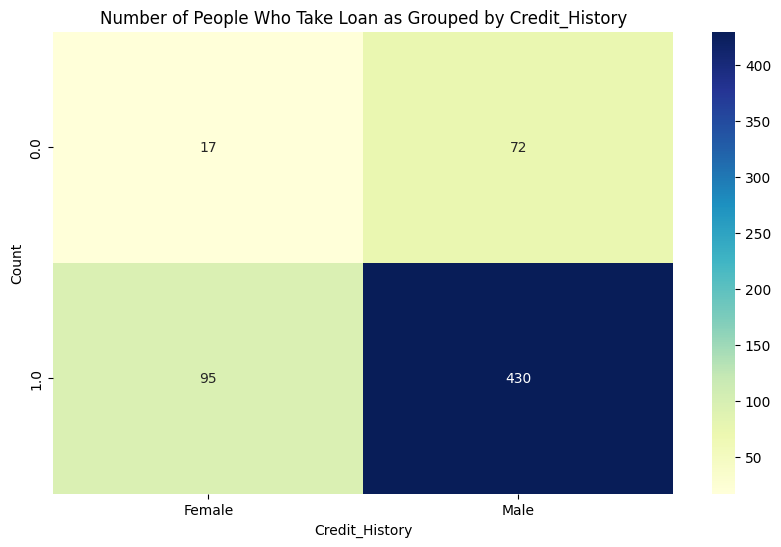

In [187]:
print('number of people who take loan as group by Credit_History')
print(df['Credit_History'].value_counts())

pivot_table = df.pivot_table(index='Credit_History', columns='Gender', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('Number of People Who Take Loan as Grouped by Credit_History')
plt.xlabel('Credit_History')
plt.ylabel('Count')

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train ,X_test, y_train ,y_test = train_test_split(x ,y ,test_size=0.2 ,random_state= 0 )

from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()

In [190]:
for i in range(0, 5):
  X_train[:,i] = LabelEncoder_x.fit_transform(X_train[:,i])
  X_train[:,7] = LabelEncoder_x.fit_transform(X_train[:,7])


X_train

array([[67, 1, 1, ..., 360.0, 1.0, 80],
       [426, 1, 0, ..., 360.0, 1.0, 131],
       [360, 1, 1, ..., 360.0, 0.0, 98],
       ...,
       [289, 1, 1, ..., 360.0, 1.0, 132],
       [156, 1, 1, ..., 360.0, 1.0, 108],
       [445, 0, 1, ..., 360.0, 1.0, 122]], dtype=object)

In [191]:
LabelEncoder_y = LabelEncoder()
y_train = LabelEncoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [192]:
for i in range(0, 5):
  X_test[:,i] = LabelEncoder_x.fit_transform(X_test[:,i])
  X_test[:,7] = LabelEncoder_x.fit_transform(X_test[:,7])


X_test

array([[93, 1, 0, 0, 10, 360.0, 1.0, 10],
       [15, 0, 0, 0, 24, 360.0, 1.0, 24],
       [108, 1, 1, 0, 71, 360.0, 1.0, 71],
       [96, 1, 1, 0, 22, 360.0, 1.0, 22],
       [16, 1, 1, 2, 16, 360.0, 1.0, 16],
       [17, 1, 1, 0, 48, 180.0, 0.0, 48],
       [109, 1, 1, 3, 45, 180.0, 1.0, 45],
       [87, 1, 0, 0, 72, 360.0, 1.0, 72],
       [73, 1, 0, 0, 30, 360.0, 0.0, 30],
       [98, 1, 1, 0, 33, 360.0, 1.0, 33],
       [61, 0, 0, 0, 10, 360.0, 1.0, 10],
       [103, 1, 1, 1, 14, 360.0, 1.0, 14],
       [47, 0, 0, 0, 68, 360.0, 1.0, 68],
       [70, 1, 1, 2, 65, 360.0, 1.0, 65],
       [85, 1, 1, 0, 15, 360.0, 1.0, 15],
       [69, 1, 1, 1, 3, 360.0, 1.0, 3],
       [91, 1, 0, 1, 58, 360.0, 1.0, 58],
       [77, 1, 0, 0, 35, 360.0, 1.0, 35],
       [97, 0, 0, 0, 13, 360.0, 1.0, 13],
       [112, 1, 1, 0, 55, 360.0, 0.0, 55],
       [13, 0, 1, 0, 28, 360.0, 0.0, 28],
       [88, 1, 1, 0, 42, 360.0, 1.0, 42],
       [49, 1, 1, 2, 21, 360.0, 1.0, 21],
       [68, 1, 1, 2, 48, 360.0, 

In [193]:
LabelEncoder_y = LabelEncoder()
y_test = LabelEncoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [194]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

X_train = ss.fit_transform(X_train)
x_test = ss.fit_transform(X_test)

In [195]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier()

rf_cls.fit(X_train ,y_train)

RandomForestClassifier()

In [196]:
from sklearn import metrics

y_pred = rf_cls.predict(x_test)

print('acc of rand forest cls is' ,metrics.accuracy_score(y_pred ,y_test))

y_pred

acc of rand forest cls is 0.8048780487804879


array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [198]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(X_train ,y_train)

GaussianNB()

In [204]:
y_pred = nb_classifier.predict(x_test)

print('acc of rand forest cls is' ,metrics.accuracy_score(y_pred ,y_test))

y_pred

acc of rand forest cls is 0.8292682926829268


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [202]:
from sklearn.tree import DecisionTreeClassifier
dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_train ,y_train)

DecisionTreeClassifier()

In [203]:

y_pred = dt_cls.predict(x_test)

print('acc of Decision clss is' ,metrics.accuracy_score(y_pred ,y_test))

y_pred

acc of Decision clss is 0.7154471544715447


array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [206]:
from sklearn.neighbors import KNeighborsClassifier
kn_clss = KNeighborsClassifier()
kn_clss.fit(X_train ,y_train)

KNeighborsClassifier()

In [209]:
y_pred = kn_clss.predict(x_test)

print('acc of KN class is' ,metrics.accuracy_score(y_pred ,y_test))
y_pred

acc of KN class is 0.7804878048780488


array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])